# Extracting top 20 countries with their GDP

Link:- https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)

# importing libraries

In [132]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [133]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
my_headers = {'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36',
           'Accept-Language':'en-US,en;q=0.9'}

# requesting 

In [134]:
gdp = requests.get(url,my_headers)

In [135]:
gdp.ok

True

# making soup

In [136]:
gdp_soup = BeautifulSoup(gdp.text,'lxml')

# getting main container of content

In [137]:
container = gdp_soup.find('div',{'id':'mw-content-text'})

In [138]:
table = container.select('.wikitable')[0]

# getting all tr tags

In [139]:
trs = table.find_all('tr')

# getting all td tags acc to row

In [140]:
tr_tds = {}

In [141]:
for t, tr in enumerate(trs):
    tds = tr.findAll('td')
    tds_text = []
    for i, td in enumerate(tds):
#         print(f"{i} : {td.text}")
        tds_text.append(td.text)
#     print()
    tr_tds[t] = tds_text

# getting top 20 country names and GDP

In [142]:
countries = []
GDP = []
region = []

In [143]:
for i in range(2,22):
    countries.append(tr_tds[i][0].strip())
    region.append(tr_tds[i][1].strip())
    GDP.append(tr_tds[i][2].strip())

In [144]:
print(len(countries))
print(len(region))
print(len(GDP))

20
20
20


# Formatting GDP value

In [145]:
numeric_GDP = []

In [146]:
for g in GDP:
    g = "".join(g.split(','))
    
    numeric_GDP.append(int(g))
#     print(g,type(g))

22939580 <class 'str'>
16862979 <class 'str'>
5103110 <class 'str'>
4230172 <class 'str'>
3108416 <class 'str'>
2946061 <class 'str'>
2940428 <class 'str'>
2120232 <class 'str'>
2015983 <class 'str'>
1823852 <class 'str'>
1647568 <class 'str'>
1645837 <class 'str'>
1610556 <class 'str'>
1439958 <class 'str'>
1285518 <class 'str'>
1150245 <class 'str'>
1081383 <class 'str'>
1007562 <class 'str'>
842588 <class 'str'>
810830 <class 'str'>


In [147]:
len(numeric_GDP)

20

# Creating Dataframe of obtained data

In [148]:
top_20 = {'countries':countries,
         'region':region,
         'GDP':numeric_GDP}

In [149]:
top_20_df = pd.DataFrame(top_20,index = range(1,21))

In [150]:
top_20_df

,countries,region,GDP
1,United States,Americas,22939580
2,China,Asia,16862979
3,Japan,Asia,5103110
4,Germany,Europe,4230172
5,United Kingdom,Europe,3108416
6,India,Asia,2946061
7,France,Europe,2940428
8,Italy,Europe,2120232
9,Canada,Americas,2015983
10,South Korea,Asia,1823852


# Plotting Bar chart

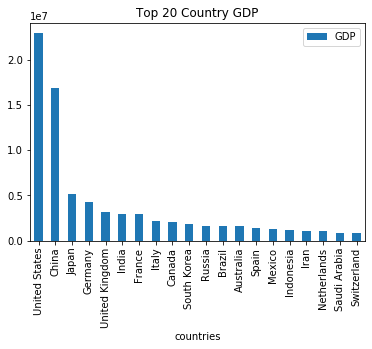

In [151]:
top_20_df.plot.bar(x='countries',y='GDP',title="Top 20 Country GDP")

# Plotting bar chart using pyplot

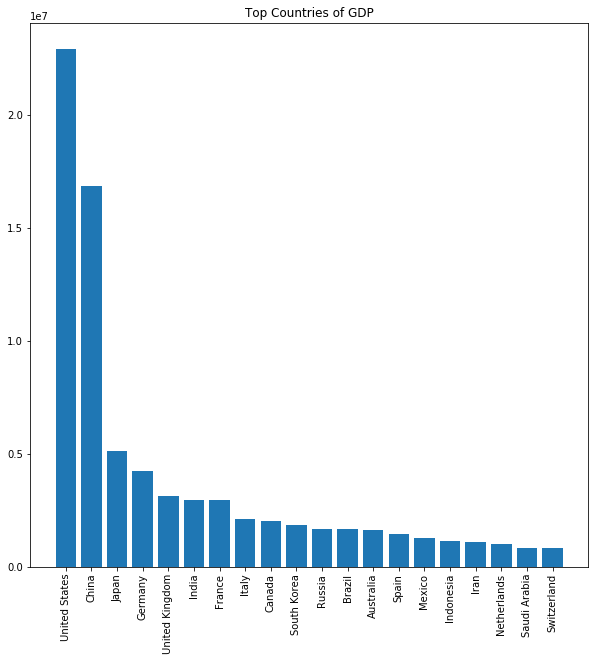

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.bar(top_20_df.countries,top_20_df.GDP)
plt.xticks(top_20_df.countries,rotation='vertical')
# plt.yticks(top_20_df.GDP,top_20_df.GDP)
# plt.ylabel('Countries')
# plt.xlabel
plt.title("Top Countries of GDP")
plt.show()

# Plotting pie chart

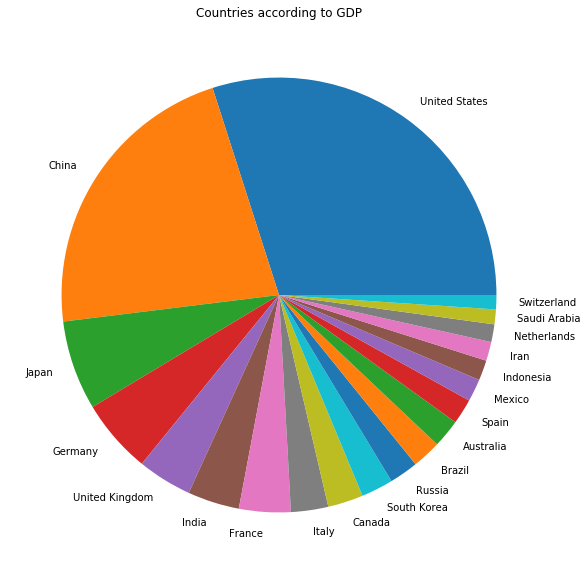

In [160]:
plt.figure(figsize=(10,10))
plt.pie(top_20_df.GDP,labels=top_20_df.countries)
plt.title("Countries according to GDP")
plt.show()

# plotting line chart

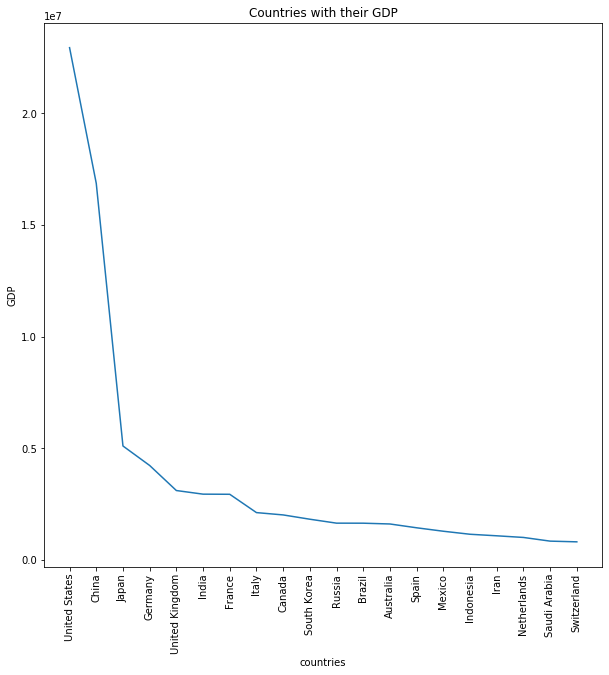

In [159]:
plt.figure(figsize=(10,10))

plt.plot(countries,numeric_GDP)
plt.xticks(countries,rotation="vertical")
plt.title("Countries with their GDP")
plt.xlabel('countries')
plt.ylabel('GDP')
plt.show()